In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# Preprocesamiento de los datos
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_cats_dir = "/content/drive/MyDrive/Pytorch_Tensorflow/Images_Clasification/Own-data-clasification/data-cats"
train_dogs_dir = "/content/drive/MyDrive/Pytorch_Tensorflow/Images_Clasification/Own-data-clasification/data-dogs"

train_generator = train_datagen.flow_from_directory(
        "/content/drive/MyDrive/Pytorch_Tensorflow/Images_Clasification/Own-data-clasification/",
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        "/content/drive/MyDrive/Pytorch_Tensorflow/Images_Clasification/Own-data-clasification/",
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        subset='validation')

# Cargar el modelo VGG16 sin incluir las capas totalmente conectadas (top)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base para evitar que se actualicen durante el entrenamiento
for layer in base_model.layers:
    layer.trainable = False

# Agregar capas personalizadas al modelo
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
      train_generator,
      validation_data=validation_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      validation_steps=validation_generator.samples // validation_generator.batch_size,
      epochs=15, verbose=1)


Found 209 images belonging to 2 classes.
Found 52 images belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step


Epoch 1/15
6/6 [==============================] - 151s 27s/step - loss: 11.9094 - accuracy: 0.5141 - val_loss: 1.9412 - val_accuracy: 0.4688
Epoch 2/15
6/6 [==============================] - 162s 28s/step - loss: 1.9077 - accuracy: 0.5819 - val_loss: 0.3870 - val_accuracy: 0.7812
Epoch 3/15
6/6 [==============================] - 163s 28s/step - loss: 0.2089 - accuracy: 0.9209 - val_loss: 0.3217 - val_accuracy: 0.8125
Epoch 4/15
6/6 [==============================] - 146s 24s/step - loss: 0.1258 - accuracy: 0.9548 - val_loss: 0.1355 - val_accuracy: 0.9688
Epoch 5/15
6/6 [==============================] - 141s 24s/step - loss: 0.0783 - accuracy: 0.9774 - val_loss: 0.1670 - val_accuracy: 0.9375
Epoch 6/15
6/6 [==============================] - 142s 23s/step - loss: 0.9741 - accuracy: 0.7684 - val_loss: 0.6575 - val_accuracy: 0.8438
Epoch 7/15
6/6 [==============================] - 144s 24s/step - loss: 0.0832 - accuracy: 0.9774 - val_loss: 0.2184 - val_accuracy: 0.8750
Epoch 8/15
6/6 [===

In [ ]:
# Evaluar el modelo
model.evaluate(train_generator)

# Hacer predicciones con el modelo
predictions = model.predict(train_generator)


7/7 [==============================] - 138s 19s/step


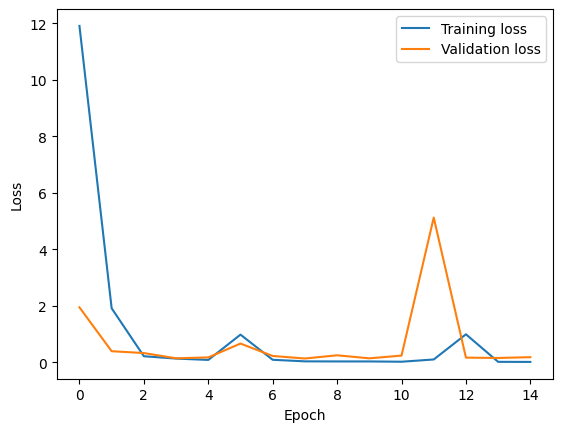

In [ ]:
# Graficar la pérdida
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

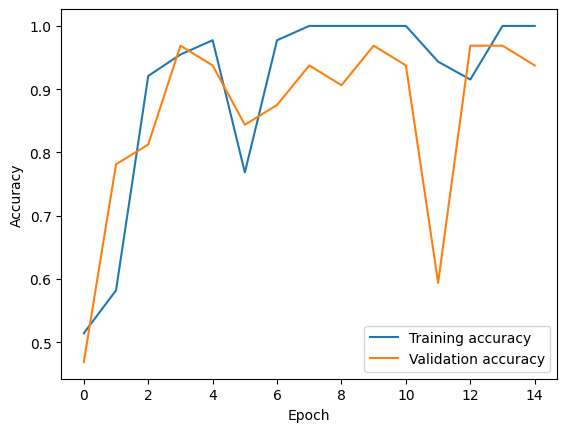

In [ ]:
# Graficar la precisión
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

2/2 [==============================] - 34s 13s/step
Matriz de confusión:
[[10 11]
 [12 19]]


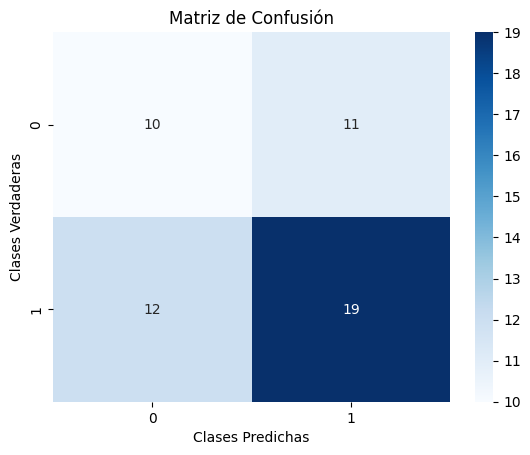

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener las predicciones en el conjunto de validación
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred)

# Obtener las verdaderas etiquetas en el conjunto de validación
y_true = validation_generator.labels

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

print("Matriz de confusión:")
print(cm)

# Creamos una visualización de la matriz de confusión usando seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Verdaderas")
plt.show()
#clase 0 = cat
#clase 1= dog